# Importar Librerias

In [6]:
# from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
# drive.mount('/content/drive')

# 1. Leer el dataset

In [8]:
df = pd.read_csv('.././data/heart_disease_examen.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,typical angina,145,233,1,2,150,0,2.3,3,0.0,6.0,No heart disease
1,67,male,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,3.0,Heart disease
2,67,male,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,7.0,Heart disease
3,37,male,non-anginal pain,130,250,0,0,187,0,3.5,3,0.0,3.0,No heart disease
4,41,female,atypical angina,130,204,0,2,172,0,1.4,1,0.0,3.0,No heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,typical angina,110,264,0,0,132,0,1.2,2,0.0,7.0,Heart disease
299,68,male,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,7.0,Heart disease
300,57,male,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,7.0,Heart disease
301,57,female,atypical angina,130,236,0,2,174,0,0.0,2,1.0,3.0,Heart disease


# 2. Verificar valores nulos

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

# Rellenar Valores Nulos

In [10]:
df.fillna({'ca': df['ca'].mean(), 'thal': df['thal'].mean()}, inplace=True)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 3. Preprocesamiento de variables categóricas

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [45]:
columnas_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [60]:
# Aplicar one-hot encoding a las columnas categóricas
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Mostrar las primeras filas para verificar
print(df_encoded.head())

   age  trestbps  chol  thalach  oldpeak            target  sex_male  \
0   63       145   233      150      2.3  No heart disease      True   
1   67       160   286      108      1.5     Heart disease      True   
2   67       120   229      129      2.6     Heart disease      True   
3   37       130   250      187      3.5  No heart disease      True   
4   41       130   204      172      1.4  No heart disease     False   

   cp_atypical angina  cp_non-anginal pain  cp_typical angina  ...  exang_1  \
0               False                False               True  ...    False   
1               False                False              False  ...     True   
2               False                False              False  ...     True   
3               False                 True              False  ...    False   
4                True                False              False  ...    False   

   slope_2  slope_3  ca_0.6722408026755853  ca_1.0  ca_2.0  ca_3.0  \
0    False     True   

In [61]:
df_encoded.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_male',
       'cp_atypical angina', 'cp_non-anginal pain', 'cp_typical angina',
       'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_2', 'slope_3',
       'ca_0.6722408026755853', 'ca_1.0', 'ca_2.0', 'ca_3.0',
       'thal_4.73421926910299', 'thal_6.0', 'thal_7.0'],
      dtype='object')

# 4. Codificar la variable objetivo(target)

In [47]:
print(df_encoded['target'].unique())

['No heart disease' 'Heart disease']


In [48]:
# Ejemplo con 'Presence' y 'Absence'
df_encoded['target'] = df_encoded['target'].map({'No heart disease': 0, 'Heart disease': 1})

# Verificar la conversión
print(df_encoded['target'].unique())

[0 1]


In [49]:
df['target'].value_counts()

target
No heart disease    164
Heart disease       139
Name: count, dtype: int64

# 5. Division de conjunto de datos (80% - 20%)

In [50]:
# Separar características y target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Mostrar las dimensiones
print("Características (X) tiene forma:", X.shape)
print("Target (y) tiene forma:", y.shape)

Características (X) tiene forma: (303, 22)
Target (y) tiene forma: (303,)


In [51]:
# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (242, 22)
X_test: (61, 22)
y_train: (242,)
y_test: (61,)


# 6. Analisis EDA

In [52]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


# Visualicacion de datos

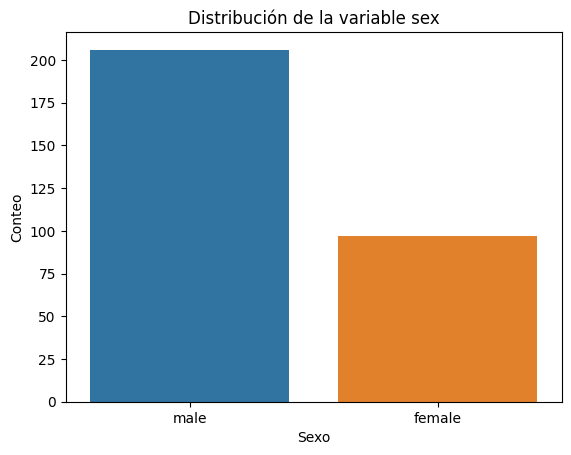

In [14]:
sns.countplot(x='sex', data=df, hue='sex')
plt.title('Distribución de la variable sex')
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.show()

# 7. Entrenamiento de modelo

In [53]:
# Inicializar el modelo
modelo = LogisticRegression(max_iter=1000)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



c:\Users\Kode\Desktop\App Flask\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 8. Calcular la precisión del modelo

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8524590163934426


# 9. Mapa de calor

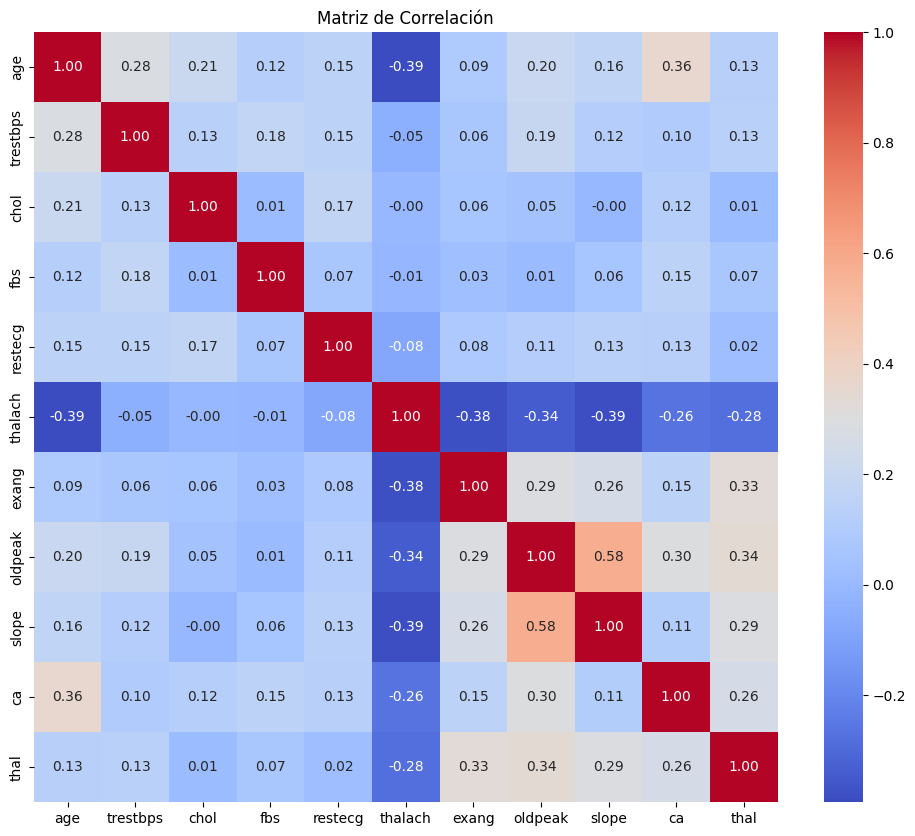

In [ ]:
numerical_df = df.select_dtypes(include=['number']) # Solo valores numericos
correlation_matrix = numerical_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Informe Detallado del Mapa de Calor:
------------------------------------
Correlación entre 'oldpeak' y 'slope': 0.58
- Existe una correlación positiva fuerte.
- A medida que aumenta el valor de oldpeak también tiende a aumentar el valor de slope

Interpretacion:
-------------
El mapa de calor muestra la correlación entre las diferentes variables numéricas del conjunto de datos.
Las celdas con colores más rojos indican una correlación positiva fuerte, mientras que las celdas con colores azules indican una correlación negativa fuerte.
Las celdas con colores cercanos al blanco o gris indican una correlación débil o inexistente.

Observacion:
-------------
Es importante analizar las correlaciones para identificar posibles relaciones entre las variables. Por ejemplo,
si dos variables están fuertemente correlacionadas, es posible que una de ellas sea redundante y se pueda eliminar del análisis.

# Matriz de confusion

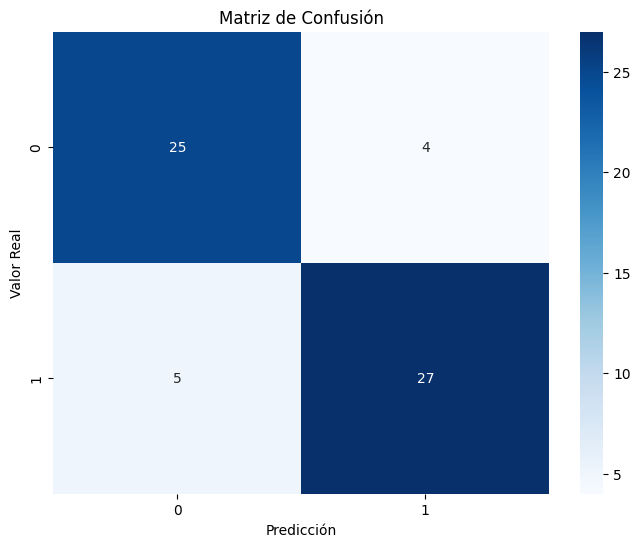

In [55]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Interpretación de la Matriz de Confusión:
---------------------------------------
Verdaderos Positivos (TP): 25
  - El modelo predijo correctamente que los pacientes tienen enfermedad cardíaca y realmente la tienen.
Verdaderos Negativos (TN): 28
  - El modelo predijo correctamente que los pacientes no tienen enfermedad cardíaca y realmente no la tienen.
Falsos Positivos (FP): 4
  - El modelo predijo incorrectamente que los pacientes tienen enfermedad cardíaca, pero en realidad no la tienen.
Falsos Negativos (FN): 4
  - El modelo predijo incorrectamente que los pacientes no tienen enfermedad cardíaca, pero en realidad sí la tienen.

In [62]:
import os
import joblib

# Definir la ruta al directorio de modelos
model_dir = '.././model'
model_path = os.path.join(model_dir, 'heart_disease_model.pkl')

# Verificar si el directorio existe; si no, crearlo
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f'El directorio {model_dir} ha sido creado.')

# Guardar el modelo
joblib.dump(modelo, model_path)
print(f'Modelo guardado en: {model_path}')

Modelo guardado en: .././model\heart_disease_model.pkl
